# 1.0 Importing Libraries

In [15]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# 2.0 Importing Data

In [16]:

df = pd.read_csv('data/full-data.csv')
df_sales = pd.read_csv('data/sales-data.csv')
df_orders = pd.read_csv('data/orders_data.csv')
df.head()


,isbn,rating_book_id,book_title,rating,price,publisher_name,marketing_spend,genre_desc,series_name,format_desc,author_name,Year Won,sales_count,invoice
0,989-28-654-4370-9,DE571,Don t Check your Ego,3.99,15.99,Palimpsest Printing,48000.0,Nonfiction,NaN,Trade paperback,R.M. Larner,NaN,45.0,719.55
1,989-28-654-9826-6,DE571,Don t Check your Ego,3.99,28.99,Palimpsest Printing,48000.0,Nonfiction,NaN,Hardcover,R.M. Larner,NaN,14.0,405.86
2,989-28-79-91028-0,TM925,The Mallemaroking,4.66,12.50,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Trade paperback,Bianca Thompson,2179.0,1368.0,17100.00
3,989-28-79-13801-1,TM925,The Mallemaroking,4.66,8.99,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Mass market paperback,Bianca Thompson,2179.0,4568.0,41066.32
4,989-28-79-71565-6,TM925,The Mallemaroking,4.66,21.50,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Hardcover,Bianca Thompson,2179.0,1279.0,27498.50


# 3.0 Data Analysis

## 3.1 Setting big numbers 

In [17]:
# Define the value to display
value_to_display = df['invoice'].sum()

# Convert value to thousands and format as USD
value_in_k = value_to_display / 1_000  # Convert to thousands
formatted_value = f"USD {value_in_k:,.0f}K"  # Format as "USD 718K"

# Create an indicator chart
fig = go.Figure(go.Indicator(
    mode="number",  # Display only the number
    value=value_in_k,  # Display the value in thousands
    title={"text": "Total Invoice"},
    number={"prefix": "USD ", "suffix": "K", "font": {"size": 48}},  # Add prefix and suffix
    domain={"x": [0, 1], "y": [0, 1]}
))

# Update layout for better scaling
fig.update_layout(
    height=250,
    width=400,
    template='plotly_white'
)

# Show the chart
fig.show()


In [18]:
from plotly import graph_objects as go

# Define the value to display
value_to_display = df['sales_count'].sum()

# Convert value to thousands and format
value_in_k = value_to_display / 1_000  # Convert to thousands
formatted_value = f"{value_in_k:,.0f}K"  # Format as "718K"

# Create an indicator chart
fig = go.Figure(go.Indicator(
    mode="number",  # Display only the number
    value=value_in_k,  # Display the value in thousands
    title={"text": "Total Sales Count"},
    number={"suffix": "K", "font": {"size": 48}},  # Add suffix and adjust font size
    domain={"x": [0, 1], "y": [0, 1]}
))

# Update layout for better scaling
fig.update_layout(
    height=200,  # Adjust height for a more compact view
    width=300,   # Adjust width for better proportion
    template='plotly_white',
    margin=dict(l=20, r=20, t=20, b=20)  # Reduce margins for tighter spacing
)

# Show the chart
fig.show()


In [19]:
# Define the value to display
value_to_display = df['book_title'].nunique()

# Create an indicator chart
fig = go.Figure(go.Indicator(
    mode="number",
    value=value_to_display,
    title={"text": "Unique Book Titles"},
    number={"font": {"size": 48}},
    domain={"x": [0, 1], "y": [0, 1]}
))

fig.update_layout(
    height=200,
    width=200,
    template='plotly_white'
)

fig.show()


## 3.2 Plotting Distribution graphs

In [20]:
from plot_utils import create_box_plot, create_high_value_bar_plot, create_horizontal_bar_plot

### 3.2.1 Gráfico de distribuição de títulos de livros por autor

In [21]:
# Create a horizontal bar plot for 'genre_desc'
create_horizontal_bar_plot(df, 'author_name')


### 3.2.1 Gráfico de distribuição de títulos de livros por Genêro

In [22]:
# Create a horizontal bar plot for 'genre_desc'
create_horizontal_bar_plot(df, 'genre_desc')


### 3.2.1 Gráfico de distribuição de títulos de livros por autor

In [23]:
# Create a horizontal bar plot for 'format_desc'
create_horizontal_bar_plot(df, 'format_desc')

### 3.2.1 Gráfico de distribuição de títulos de livros por editora

In [24]:
# Create a horizontal bar plot for 'publisher_name'
create_horizontal_bar_plot(df, 'publisher_name')

## 3.3 Plotando matriz de correleção - Quais variavéis numéricas estão correlacionadas com o invoice?

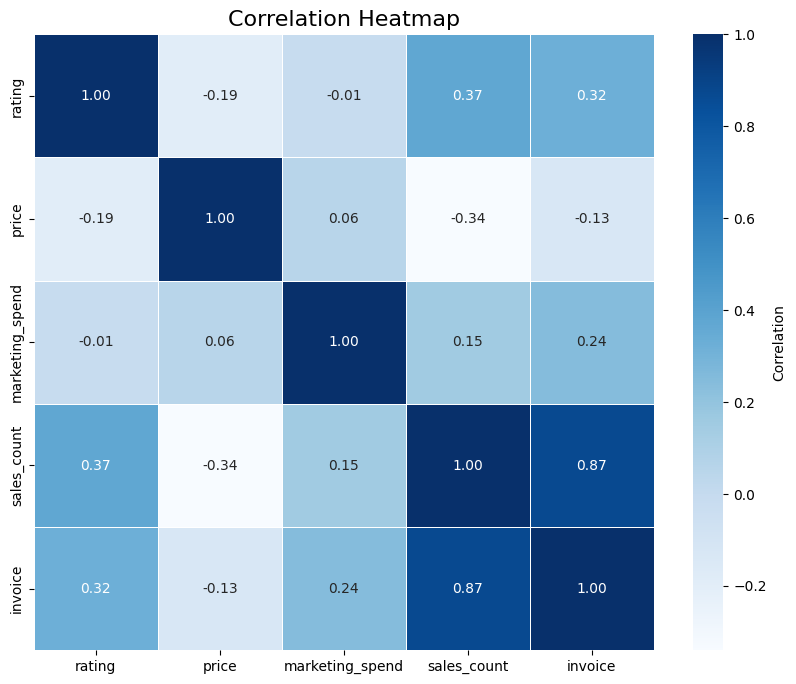

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = ['rating', 'price', 'marketing_spend', 'sales_count', 'invoice']

# Calculate correlation
correlation_matrix = df[numerical_cols].corr(method='pearson')

# Plot the heatmap with sky blue colors
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="Blues",  # Use the Blues color palette for sky blue tones
    cbar_kws={'label': 'Correlation'},  # Add a color bar label
    linewidths=0.5  # Add grid lines between squares
)

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


## 3.4 Distribuições Financeiras - Análise de Faturamento

### 3.4.1 Distribuição de Faturamentopor título de livro 

In [44]:
# Setting invoice type as float and filling nan values
df['invoice'] = df['invoice'].astype('float64')
df['book_title'] = df['book_title'].fillna('Unknown')

# Create a box plot for 'invoice'
create_box_plot(df, 'invoice')



### 3.4.2 Faturamento por título de livro no quartil superior 

In [27]:
# Create a bar plot for high 'invoice' by 'book_title'
create_high_value_bar_plot(df, column_name='book_title', aggregation_column='invoice')


### 3.4.3 Faturamento por Genêro no quartil superior 

In [28]:
# Create a bar plot for high 'invoice' by 'genre_desc'
create_high_value_bar_plot(df, column_name='genre_desc', aggregation_column='invoice')


### 3.4.4 Faturamento por formato no quartil superior 

In [ ]:
# Create a bar plot for high 'invoice' by 'format_desc'
create_high_value_bar_plot(df, column_name='format_desc', aggregation_column='invoice')


### 3.4.5 Faturamento por editora no quartil superior 

In [46]:
# Create a bar plot for high 'invoice' by 'publisher_name'
create_high_value_bar_plot(df, column_name='publisher_name', aggregation_column='invoice')



### 3.4.6 Faturamento por autor no quartil superior 

In [47]:
# Create a bar plot for high 'invoice' by 'author_name'
create_high_value_bar_plot(df, column_name='author_name', aggregation_column='invoice')


## 3.5 Distribuição percentual de faturamento por intervalos de preços

In [48]:
# Defining price ranges
bins = [0, 10, 20, 30, 50]  # Price range limits
labels = ['0-10', '10-20', '20-30', '30-50']  # Price range labels

# Creating a price range column
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Aggregating sales by price range as percentages
sales_by_price_range = df.groupby('price_range', observed=False)['sales_count'].sum()
total_sales_count = sales_by_price_range.sum()
sales_by_price_range_percentage = (sales_by_price_range / total_sales_count) * 100

# Aggregating invoice by price range as percentages
invoice_by_price_range = df.groupby('price_range', observed=False)['invoice'].sum()
total_invoice = invoice_by_price_range.sum()
invoice_by_price_range_percentage = (invoice_by_price_range / total_invoice) * 100

# Creating the first chart: Sales Count Percentage by Price Range
fig_sales_percentage = go.Figure()
fig_sales_percentage.add_trace(go.Bar(
    x=sales_by_price_range_percentage.index.astype(str),
    y=sales_by_price_range_percentage,
    name='Sales Count Percentage',
    marker=dict(
        color='skyblue'  # Apply a consistent sky blue color
    )
))
fig_sales_percentage.update_layout(
    title='Sales Count Percentage by Price Range',
    xaxis=dict(title='Price Range', tickangle=45),
    yaxis=dict(title='Percentage (%)'),
    height=400
)

# Creating the second chart: Invoice Percentage by Price Range
fig_invoice_percentage = go.Figure()
fig_invoice_percentage.add_trace(go.Bar(
    x=invoice_by_price_range_percentage.index.astype(str),
    y=invoice_by_price_range_percentage,
    name='Invoice Percentage',
    marker=dict(
        color='skyblue'  # Apply a consistent sky blue color
    )
))
fig_invoice_percentage.update_layout(
    title='Invoice Percentage by Price Range',
    xaxis=dict(title='Price Range', tickangle=45),
    yaxis=dict(title='Percentage (%)'),
    height=400
)

# Displaying the percentage charts
fig_sales_percentage.show()
fig_invoice_percentage.show()

# Merging the percentage data into a DataFrame
df_by_price_range_percentage = pd.DataFrame({
    'Sales Count Percentage': sales_by_price_range_percentage,
    'Invoice Percentage': invoice_by_price_range_percentage
})


## 3.6 Análise de faturamento de livros de alto rating e baixo faturamento

In [49]:
high_rating = df['rating'].quantile(0.75)
low_invoice = df['invoice'].quantile(0.25)

df['sales_count'] = df['sales_count'].astype('float64')

df['book_title'] = df['book_title'].fillna('Unknown')


## Definning df Sales count for high rating books 
df_li_hr = df[(df['rating'] >= high_rating) & (df['sales_count'] <= low_invoice)]
df_li_hr = df_li_hr.sort_values('sales_count', ascending=False)



df_li_hr_groupped = df_li_hr.groupby(['book_title'], as_index = False).agg({'invoice':'sum',
                                                                                              'rating':'mean', 
                                                                                              'sales_count':'sum'})

# df_sales_count_hr.head()
df_li_hr_groupped.sort_values('invoice',ascending=False, inplace= True)

In [50]:
# Create df_rating sorted by ratings 
df_rating = df.groupby('book_title', as_index=False).agg({
    'rating': 'mean',
    'invoice': 'sum',
    'sales_count':'sum',    
    'price':'mean'
})
df_rating.sort_values('rating', ascending= False).round(2)

# Calculate the top quartile threshold
top_quartile_threshold = df_rating['rating'].quantile(0.5)

# Filter the top quartile
top_quartile = df_rating[df_rating['rating'] >= top_quartile_threshold]

top_quartile = top_quartile.sort_values('rating', ascending=False)



# Create a box plot for 'ratings'
create_box_plot(df, 'rating')
import plotly.graph_objects as go
import plotly.graph_objects as go

# Create the first figure for top quartile books
fig1 = go.Figure()

# Add the bar chart for ratings with sky blue color
fig1.add_trace(go.Bar(
    x=top_quartile['book_title'],
    y=top_quartile['rating'],
    name='Rating',
    marker=dict(
        color='skyblue'  # Apply a consistent sky blue color
    ),
    yaxis='y1'
))

# Add the line chart for invoice
fig1.add_trace(go.Scatter(
    x=top_quartile['book_title'],
    y=top_quartile['invoice'],
    name='Invoice',
    mode='lines+markers',
    marker=dict(color='red'),
    yaxis='y2'
))

# Update the layout for dual Y-axes
fig1.update_layout(
    title='Top Quartile Books by Rating and Invoice',
    xaxis=dict(title='Book Title', tickangle=45),
    yaxis=dict(  # Define the primary Y-axis
        title='Average Rating',
        side='left',
        range=[4, 4.7]  # Adjust range for ratings
    ),
    yaxis2=dict(  # Define the secondary Y-axis
        title='Total Invoice',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.5, y=1.1, orientation='h'),
    height=400
)

# Show the first figure
fig1.show()

# Create the second figure for books with low invoice and high ratings
fig2 = go.Figure()

# Add the bar chart for invoice with sky blue color
fig2.add_trace(go.Bar(
    x=df_li_hr_groupped['book_title'],
    y=df_li_hr_groupped['invoice'],  # Use 'invoice' instead of 'sales_count'
    name='Invoice',
    marker=dict(
        color='skyblue'  # Apply a consistent sky blue color
    )
))

# Add the line chart for ratings
fig2.add_trace(go.Scatter(
    x=df_li_hr_groupped['book_title'],
    y=df_li_hr_groupped['rating'],
    name='Rating',
    mode='lines+markers',
    marker=dict(color='red'),
    yaxis='y2'
))

# Update the layout for dual Y-axes
fig2.update_layout(
    title='Books with Low Invoice and Ratings',
    xaxis=dict(title='Book Title', tickangle=45),
    yaxis=dict(  # Define the primary Y-axis
        title='Invoice',
        side='left'
    ),
    yaxis2=dict(  # Define the secondary Y-axis
        title='Rating',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right',
        range=[3, 4.7]  # Adjust range for ratings
    ),
    legend=dict(x=0.5, y=1.1, orientation='h'),
    template='plotly_white',
    height=400
)

# Show the second figure
fig2.show()


## 3.7 Análise de sazionalidade de vendas

### 3.7.1 Análise de sazionalidade granular - diária

In [35]:

## 3.4 H4 - Existe sazonalidade de vendas?

#R8 - Não é possível analisar sazionalidade pois o intervalo de dados é somente de 1 ano. Contudo podemos ver um padrão claro de frequência no dia da semana, com um pico no final de semanas padrão ao longo de todo ano. 

df_sales = pd.read_csv('data/sales-data.csv')
df_sales.dtypes

first_date = df_sales['sale_date'].min()
last_date = df_sales['sale_date'].max()

# print(f'The interval of analysis starts at {first_date} and ends at {last_date}')
import pandas as pd
import plotly.express as px

# Convert sale_date to datetime format
df_sales['sale_date'] = pd.to_datetime(df_sales['sale_date'], errors='coerce')

# Aggregate data by sale_date
daily_sales = df_sales.groupby('sale_date')['count'].sum().reset_index()

# Limiting the dataset to the first 100 rows 
# daily_sales = daily_sales.iloc[:100]

# Plot the continuous sales trend using Plotly
fig = px.line(
    daily_sales,
    x='sale_date',
    y='count',
    title='Continuous Sales Trends Over Time',
    labels={'sale_date': 'Date', 'count': 'Total Sales'},
    markers=True
)

fig.update_traces(
    line_color='skyblue'  
)
# Customize the layout for better readability
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickformat='%Y-%m-%d',
    template='plotly_white',
    hovermode='x unified'
)

# Show the interactive plot
fig.show()


### 3.7.2 Análise de sazionalidade granular - semanal

In [36]:

import pandas as pd
import plotly.express as px

# Step 1: Convert sale_date to datetime format
df_sales['sale_date'] = pd.to_datetime(df_sales['sale_date'], errors='coerce')

# Step 2: Aggregate data by week
df_sales['week'] = df_sales['sale_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales = df_sales.groupby('week')['count'].sum().reset_index()

# Step 3: Plot the continuous sales trend using Plotly
fig = px.line(
    weekly_sales,
    x='week',
    y='count',
    title='Weekly Sales Trends Over Time',
    labels={'week': 'Week', 'count': 'Total Sales'},
    markers=True
)

# Customize the layout for better readability
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickformat='%Y-%m-%d',
    template='plotly_white',
    hovermode='x unified'
)

fig.update_traces(
    line_color='skyblue'  
)

# Show the interactive plot
fig.show()


### 3.7.3 Análise de sazionalidade granular - mensal

In [ ]:
# Convert sale_date to datetime format
df_sales['sale_date'] = pd.to_datetime(df_sales['sale_date'], errors='coerce')

# Extract the month name
df_sales['month'] = df_sales['sale_date'].dt.month_name()

# Group by month and sum sales count
monthly_sales = df_sales.groupby('month', sort=False)['count'].sum().reset_index()

# Sort months in the correct order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('month')

# Plot sales by month using Plotly as a line graph
fig = px.line(
    monthly_sales,
    x='month',
    y='count',
    title='Total Sales by Month',
    labels={'month': 'Month', 'count': 'Total Sales'},
    markers=True,  # Add markers to the line graph
    text='count'  # Add text on top of each point
)

# Customize the layout and line appearance
fig.update_traces(
    line=dict(color='skyblue', width=3),  # Set line color to sky blue and adjust width
    textposition='top center'  # Position the text on top of each point
)
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_white'
)

# Show the interactive line graph
fig.show()


## 3.8 Distribuição de vendas por genêro por tipo de livro

In [51]:
import pandas as pd
import plotly.express as px

# Step 1: Group by genre and format, summing the sales count
genre_format_sales = df.groupby(['genre_desc', 'format_desc'])['sales_count'].sum().reset_index()

# Step 2: Create a grouped bar plot
fig = px.bar(
    genre_format_sales,
    x='genre_desc',
    y='sales_count',
    color='format_desc',
    title='Sales by Genre and Book Format',
    labels={'genre_desc': 'Genre', 'sales_count': 'Total Sales', 'format_desc': 'Format'},
    barmode='group',  # Grouped bar chart
    color_discrete_sequence=px.colors.qualitative.Vivid  # Use a vivid color palette
)

# Step 3: Customize layout for readability
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title='Book Format',
    template='plotly_white'
)

# Show the plot
fig.show()

import warnings
warnings.filterwarnings("ignore")

## 3.9 Ánalise de Faturamento de compras conjuntas - duplas e trios 

In [ ]:
import pandas as pd
from itertools import combinations
from collections import Counter
import plotly.express as px

df1 = pd.merge(df, df_orders, on='isbn', how='inner')

# Agrupar por order_id e coletar todos os livros (book_title) vendidos juntos
order_books = df1.groupby('order_id')['book_title'].apply(list)

# Gerar combinações de livros dentro de cada pedido (duos)
book_combinations = []
for books in order_books:
    if len(books) > 1:  # Apenas considera pedidos com mais de um livro
        book_combinations.extend(combinations(sorted(books), 2))

# Contar a recorrência de combinações (duos)
combination_counts = Counter(book_combinations)

# Transformar o resultado em um DataFrame
recurrence_df_duo = pd.DataFrame(combination_counts.items(), columns=['Book_Duo', 'Frequency'])

# Ordenar por frequência para facilitar a análise
recurrence_df_duo = recurrence_df_duo.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Selecionar os 10 duos mais frequentes
top_duo = recurrence_df_duo.head(10)

# Transformar os duos em strings legíveis
top_duo['Book_Duo'] = top_duo['Book_Duo'].apply(lambda x: ', '.join(x))

# Criar o gráfico de barras horizontal para os duos usando viridis_r
fig = px.bar(
    top_duo,
    x='Frequency',
    y='Book_Duo',
    orientation='h',
    title='Top 10 Duos of Books Sold Together',
    labels={'Frequency': 'Frequency', 'Book_Duo': 'Book Duo'},
    text='Frequency',
    color_discrete_sequence=['skyblue'])

# Personalizar a aparência
fig.update_traces(textposition='outside')  # Exibir a frequência fora das barras
fig.update_layout(
    xaxis=dict(showgrid=True),
    yaxis=dict(autorange="reversed"),  # Ordem invertida (maior no topo)
    title=dict(font_size=18),
    font=dict(size=12),
)

# Exibir o gráfico
fig.show()

# Repetir o processo para trios
book_combinations = []
for books in order_books:
    if len(books) > 2:  # Apenas considera pedidos com mais de dois livros
        book_combinations.extend(combinations(sorted(books), 3))

# Contar a recorrência de combinações (trios)
combination_counts = Counter(book_combinations)

# Transformar o resultado em um DataFrame
recurrence_df_trio = pd.DataFrame(combination_counts.items(), columns=['Book_Trio', 'Frequency'])

# Ordenar por frequência para facilitar a análise
recurrence_df_trio = recurrence_df_trio.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Selecionar os 10 trios mais frequentes
top_trios = recurrence_df_trio.head(10)

# Transformar os trios em strings legíveis
top_trios['Book_Trio'] = top_trios['Book_Trio'].apply(lambda x: ', '.join(x))

# Criar o gráfico de barras horizontal para os trios usando viridis_r
fig = px.bar(
    top_trios,
    x='Frequency',
    y='Book_Trio',
    orientation='h',
    title='Top 10 Trios of Books Sold Together',
    labels={'Frequency': 'Frequency', 'Book_Trio': 'Book Trio'},
    text='Frequency',
    color_discrete_sequence=['skyblue'])

# Personalizar a aparência
fig.update_traces(textposition='outside')  # Exibir a frequência fora das barras
fig.update_layout(
    xaxis=dict(showgrid=True),
    yaxis=dict(autorange="reversed"),  # Ordem invertida (maior no topo)
    title=dict(font_size=18),
    font=dict(size=12),
    )

# Exibir o gráfico
fig.show()


## 3.10 Ánalise de faturamento de livros premiados 

In [40]:
import pandas as pd
import plotly.express as px

# Rename column for consistency
df.rename(columns={'Year Won': 'year_won'}, inplace=True)

# Separate books by whether they have won awards
award = df[df['year_won'].notnull()]
non_award = df[df['year_won'].isnull()]

# Calculate metrics for books with and without awards
award_impact = {
    'With Awards': {  # Renamed to English
        'Invoice': award['invoice'].mean()
    },
    'Without Awards': {  # Renamed to English
        'Invoice': non_award['invoice'].mean()
    }
}

# Convert the dictionary into a DataFrame
impact_df = pd.DataFrame(award_impact).T

# Reset the index for easier manipulation
impact_df.reset_index(inplace=True)
impact_df.rename(columns={'index': 'Award Status', 'Invoice': 'Value'}, inplace=True)

# Assign custom colors (sky blue for one category, light red for the other)
custom_colors = {
    'With Awards': 'skyblue',  # Sky blue
    'Without Awards': '#b5646d'  # Light red
}

# Create the pie chart
fig = px.pie(
    impact_df,
    names='Award Status',  # Categories
    values='Value',  # Values
    title='Impact of Awards on Books (Average Invoice)',
    color='Award Status',  # Map colors based on Award Status
    color_discrete_map=custom_colors  # Custom colors for the categories
)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    font=dict(size=12)
)

# Show the chart
fig.show()


## 3.11 Ánalise de faturamento de livros em séries

In [41]:
import pandas as pd
import plotly.express as px

# Identify books in series and standalone books
books_in_series = df[df['series_name'].notnull()]
books_not_in_series = df[df['series_name'].isnull()]

# Calculate metrics for books in series and standalone books
series_analysis = {
    'In Series': {  # Renamed to English
        'Revenue': books_in_series['invoice'].sum()
    },
    'Standalone': {  # Renamed to English
        'Revenue': books_not_in_series['invoice'].sum()
    }
}

# Create a DataFrame for comparison
series_analysis_df = pd.DataFrame(series_analysis).T

# Reset the index for easier manipulation
series_analysis_df.reset_index(inplace=True)
series_analysis_df.rename(columns={'index': 'Book Type', 'Revenue': 'Value'}, inplace=True)

# Assign custom colors (sky blue for one category, light red for the other)
custom_colors = {
    'In Series': 'skyblue',  # Sky blue
    'Standalone': '#b5646d'  # Light red
}

# Create the pie chart with custom colors
fig = px.pie(
    series_analysis_df,
    names='Book Type',  # Category
    values='Value',  # Revenue values
    title="Revenue Distribution: Books in Series vs Standalone Books",
    color='Book Type',  # Map colors based on Book Type
    color_discrete_map=custom_colors  # Custom colors for Book Types
)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    font=dict(size=12)
)

# Show the chart
fig.show()

# 4.0 Recommendations 